# API Sitios Visitados


Vamos a desarrollar una API sencilla en Foursquare Places para localizar restaurantes y otros sitios a visitar y después subirlos a una API personal de AIRTABLE.

In [1]:
import numpy as np
import pandas as pd
import requests
from pprint import pprint
import folium
from time import sleep

## Acceso

In [2]:
CLIENT_ID = "QCDWZLNWZBWTQKPLJLC2GCFIGRICGGQX1D1AJD1JUM0FMUPU"

CLIENT_SECRET = "NVRHLER4BNQ2LHGUEWDFPAIF132KBCT2JHQU5X35MLCS1S0B"

API_KEY = "fsq3gHQLqKS5DaSzw9RzKUqjuW9Ec14h06kJE5xVxKSHAfg="

Para este API necesitamos definir parámetros y un diccionario con las credenciales de acceso, y para la selección de categorías se acude a la taxonomía publicada con el resto de documentación técnica en https://location.foursquare.com/places/docs/categories.

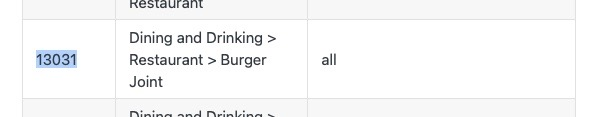

In [3]:
url = "https://api.foursquare.com/v3/places/search"
query = "burguer"
categories = "13031"
near = "Coruña"
limit = 50
endpoint = f"{url}?query={query}&categories={categories}&near={near}&limit={limit}"
headers = {"accept"       : "application/json", 
           "Authorization": API_KEY}

response = requests.get(url= endpoint, headers=headers)
print(response.status_code)

200


# 3. Recopilación de información

In [4]:
recop = response.content
pprint(recop)

(b'{"results":[{"fsq_id":"5134f2ee90e7a252b70c88c5","categories":[{"id":13031,"'
 b'name":"Burger Joint","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v'
 b'2/food/burger_","suffix":".png"}}],"chains":[],"distance":1213,"geocodes":{"'
 b'main":{"latitude":43.363517,"longitude":-8.406254},"roof":{"latitude":43.363'
 b'517,"longitude":-8.406254}},"link":"/v3/places/5134f2ee90e7a252b70c88c5","lo'
 b'cation":{"address":"Federico Tapia, 19","admin_region":"Galicia","country":"'
 b'ES","formatted_address":"Federico Tapia, 19, 15005 La Coru\xc3\xb1a Galici'
 b'a","locality":"A Coru\xc3\xb1a","postcode":"15005","region":"Galicia"},"na'
 b'me":"Barlovento","related_places":{},"timezone":"Europe/Madrid"},{"fsq_id":"'
 b'548ea16c498ee06c327639ca","categories":[{"id":13031,"name":"Burger Joint","i'
 b'con":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/burger_","suffix'
 b'":".png"}},{"id":13068,"name":"American Restaurant","icon":{"prefix":"https:'
 b'//ss3.4sqi.net/img/categories

Los datos recpilados en el paso anterior necesitan ser transformados en JSON para su operación, ya que la variable almacenada será un diccionario.

In [5]:
recop_def = response.json()
pprint(recop_def)

{'context': {'geo_bounds': {'circle': {'center': {'latitude': 43.37135,
                                                  'longitude': -8.396},
                                       'radius': 2256}}},
 'results': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
                                       'suffix': '.png'},
                              'id': 13031,
                              'name': 'Burger Joint'}],
              'chains': [],
              'distance': 1213,
              'fsq_id': '5134f2ee90e7a252b70c88c5',
              'geocodes': {'main': {'latitude': 43.363517,
                                    'longitude': -8.406254},
                           'roof': {'latitude': 43.363517,
                                    'longitude': -8.406254}},
              'link': '/v3/places/5134f2ee90e7a252b70c88c5',
              'location': {'address': 'Federico Tapia, 19',
                           'admin_region': 'Galicia',
         

Revisada la estructura de la información, creamos una nueva variable, resultados, que nos permita acceder a la información:

In [6]:
resultados = recop_def["results"]

Comprobamos que la búsqueda detecta 13 establecimientos, un número inferior al esperado.

In [7]:
len(resultados)

13

In [8]:
resultados

[{'fsq_id': '5134f2ee90e7a252b70c88c5',
  'categories': [{'id': 13031,
    'name': 'Burger Joint',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
     'suffix': '.png'}}],
  'chains': [],
  'distance': 1213,
  'geocodes': {'main': {'latitude': 43.363517, 'longitude': -8.406254},
   'roof': {'latitude': 43.363517, 'longitude': -8.406254}},
  'link': '/v3/places/5134f2ee90e7a252b70c88c5',
  'location': {'address': 'Federico Tapia, 19',
   'admin_region': 'Galicia',
   'country': 'ES',
   'formatted_address': 'Federico Tapia, 19, 15005 La Coruña Galicia',
   'locality': 'A Coruña',
   'postcode': '15005',
   'region': 'Galicia'},
  'name': 'Barlovento',
  'related_places': {},
  'timezone': 'Europe/Madrid'},
 {'fsq_id': '548ea16c498ee06c327639ca',
  'categories': [{'id': 13031,
    'name': 'Burger Joint',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
     'suffix': '.png'}},
   {'id': 13068,
    'name': 'American Restaurant',


A continuación generamos un bucle que nos permite extraer y ordenar toda la información:

In [9]:
df_burguer = []

for i in resultados:
    nombre = i["name"]
    dire = i["location"]["formatted_address"]
    latitud = i["geocodes"]["main"]["latitude"] 
    longitud = i["geocodes"]["main"]["longitude"] 
    
    df_burguer.append([nombre, dire, latitud, longitud])

# 4. Creación de un DataFrame

El data Frame final quedaría tal que:

In [10]:
df_burguer_def = pd.DataFrame(data = df_burguer, columns = ["nombre","dire", "latitud","longitud"])

In [11]:
df_burguer_def

,nombre,dire,latitud,longitud
0,Barlovento,"Federico Tapia, 19, 15005 La Coruña Galicia",43.363517,-8.406254
1,La Pepita Burger,"R. Juan Flórez, 13, 15004 La Coruña Galicia",43.365706,-8.408201
2,Las Pepas foodrinks,"Calle Juan Flórez, 76, 15005 La Coruña Galicia",43.362830,-8.408229
3,Goiko,"Rubine, 11, 15004 La Coruña Galicia",43.367696,-8.409001
4,Zun,"Franja, 57, 15001 La Coruña Galicia",43.370881,-8.398642
5,La Burguería Coruña,"Calle de Durán Loriga, 2, 15003 La Coruña Galicia",43.368093,-8.404274
6,Jumbo H 1,"Avenida Eusebio Da Guarda, 2 (Capitán Juan Var...",43.355542,-8.407807
7,Burguer 41,"Calle Orzan, 41, La Coruña Galicia",43.369142,-8.401196
8,Hamburguesería Campus,"Avenida Manuel Murguia, 36, 15011 La Coruña Ga...",43.369257,-8.419597
9,Cheesy Burger,"Rúa Pondal, 5, 15004 La Coruña Galicia",43.367548,-8.412240


# 5. Creación de un Mapa

Mediante un mapa vamos a localizar cada uno de los restaurantes.

In [12]:

mapa = folium.Map(location = [43.340425, -8.405533], zoom_start = 13)

puntos = folium.map.FeatureGroup()
for lat, lng in zip(df_burguer_def["latitud"],df_burguer_def["longitud"]): 
    
  puntos.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 9,
                                            color        = "red",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

mapa.add_child(puntos)

mapa

# 6. Subida de información a AIRTABLE 

Primero introducimos las credenciales de la cuenta y la tabla:

In [13]:
API_KEY = "keyRc6JmNDvpMS5Lj" # Usuario

BASE_ID = "appGG92mB4R5D1DBm" # Base: Tabla API

TABLE_ID = "tblovL9TxJ8cU3O7A" # Tabla: datos_1

airtable_base_url = "https://api.airtable.com/v0"

Ahora comprobamos las creadenciales, creando headers, como "llave" de acceso.

In [14]:
headers = {"Authorization" : f"Bearer {API_KEY}",
           "Content-Type"  : "application/json"}

print(headers)

{'Authorization': 'Bearer keyRc6JmNDvpMS5Lj', 'Content-Type': 'application/json'}


Ahora empezamos a definit el endpoint y sus características.

In [15]:
endpoint = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"

print(endpoint)

https://api.airtable.com/v0/appGG92mB4R5D1DBm/tblovL9TxJ8cU3O7A


In [16]:
df_burguer_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    13 non-null     object 
 1   dire      13 non-null     object 
 2   latitud   13 non-null     float64
 3   longitud  13 non-null     float64
dtypes: float64(2), object(2)
memory usage: 544.0+ bytes


In [17]:
df_burguer_def_subir = df_burguer_def[df_burguer_def.columns].astype(str)

In [18]:
df_burguer_def_subir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nombre    13 non-null     object
 1   dire      13 non-null     object
 2   latitud   13 non-null     object
 3   longitud  13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [19]:
df_burguer_def_subir2 = [x.strip() for x in df_burguer_def_subir.columns]

In [20]:
df_subir = df_burguer_def_subir[df_burguer_def_subir2]

In [21]:
df_subir

,nombre,dire,latitud,longitud
0,Barlovento,"Federico Tapia, 19, 15005 La Coruña Galicia",43.363517,-8.406254
1,La Pepita Burger,"R. Juan Flórez, 13, 15004 La Coruña Galicia",43.365706,-8.408201
2,Las Pepas foodrinks,"Calle Juan Flórez, 76, 15005 La Coruña Galicia",43.36283,-8.408229
3,Goiko,"Rubine, 11, 15004 La Coruña Galicia",43.367696,-8.409001
4,Zun,"Franja, 57, 15001 La Coruña Galicia",43.370881,-8.398642
5,La Burguería Coruña,"Calle de Durán Loriga, 2, 15003 La Coruña Galicia",43.368093,-8.404274
6,Jumbo H 1,"Avenida Eusebio Da Guarda, 2 (Capitán Juan Var...",43.355542,-8.407807
7,Burguer 41,"Calle Orzan, 41, La Coruña Galicia",43.369142,-8.401196
8,Hamburguesería Campus,"Avenida Manuel Murguia, 36, 15011 La Coruña Ga...",43.369257,-8.419597
9,Cheesy Burger,"Rúa Pondal, 5, 15004 La Coruña Galicia",43.367548,-8.41224


In [22]:
datos_json = [{"fields": df_subir.iloc[i, : ].to_dict()} for i in range(df_subir.shape[0])]

In [23]:
pprint(datos_json)

[{'fields': {'dire': 'Federico Tapia, 19, 15005 La Coruña Galicia',
             'latitud': '43.363517',
             'longitud': '-8.406254',
             'nombre': 'Barlovento'}},
 {'fields': {'dire': 'R. Juan Flórez, 13, 15004 La Coruña Galicia',
             'latitud': '43.365706',
             'longitud': '-8.408201',
             'nombre': 'La Pepita Burger'}},
 {'fields': {'dire': 'Calle Juan Flórez, 76, 15005 La Coruña Galicia',
             'latitud': '43.36283',
             'longitud': '-8.408229',
             'nombre': 'Las Pepas foodrinks'}},
 {'fields': {'dire': 'Rubine, 11, 15004 La Coruña Galicia',
             'latitud': '43.367696',
             'longitud': '-8.409001',
             'nombre': 'Goiko'}},
 {'fields': {'dire': 'Franja, 57, 15001 La Coruña Galicia',
             'latitud': '43.370881',
             'longitud': '-8.398642',
             'nombre': 'Zun'}},
 {'fields': {'dire': 'Calle de Durán Loriga, 2, 15003 La Coruña Galicia',
             'latitud': '43

Como último paso subimos la información al AirTable

In [24]:
for i in range(0, df_subir.shape[0], 10):
    
    data = {"records" : datos_json[i : i + 10]}
    
    response = requests.post(url = endpoint, json = data, headers = headers) # POST
    
    sleep(0.5)

Comprobamos que la información está en el Airtable.

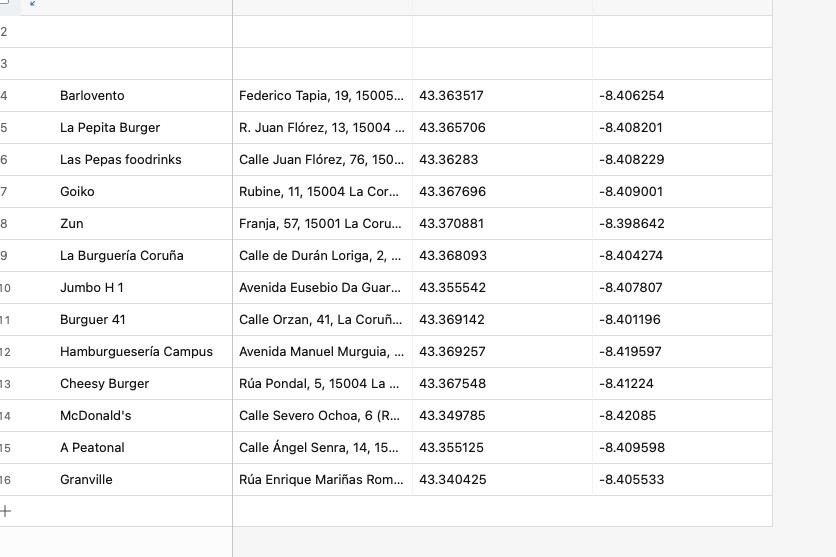

También podemos generar nuevas vistas en Airtable que nos permitirían por ejemplo, tener una ficha con comentarios de cada restaurante, o una fotografía del mismo.

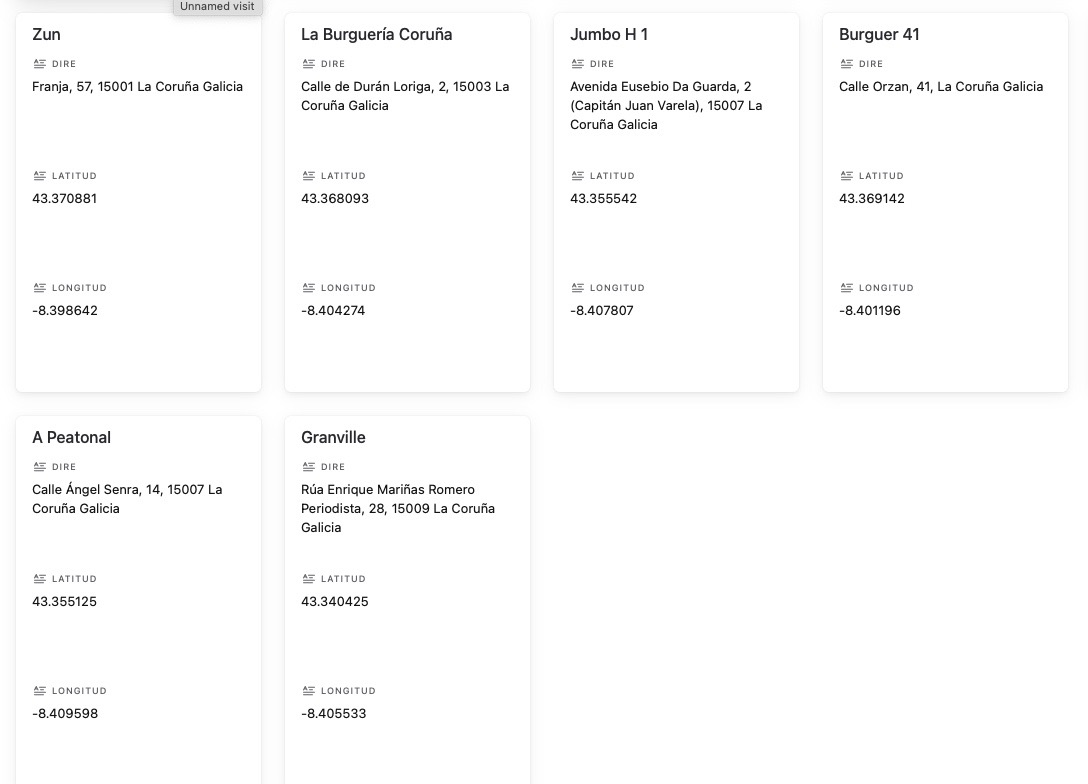